## CNN


In [66]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
from tensorflow.keras.models import load_model

In [68]:
(Xtrain, Ytrain), (Xtest, Ytest) = datasets.cifar10.load_data()

In [69]:
Xtest.shape

(10000, 32, 32, 3)

In [70]:
total_pixels = 32*32*3
total_pixels

3072

In [71]:
Ytrain.shape

(50000, 1)

In [72]:
Ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [73]:
Ytrain = Ytrain.reshape(-1,)
Ytest = Ytest.reshape(-1,)

In [74]:
Ytrain

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [75]:
Ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [76]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### plot some images to see what they are

In [77]:
def plot_sample(X,y ,index):
  plt.figure(figsize=(15,5))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

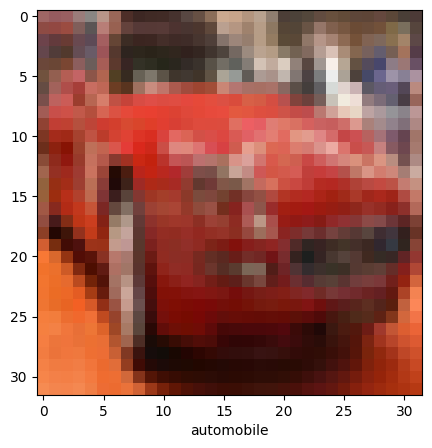

In [78]:
plot_sample(Xtrain,Ytrain,5)

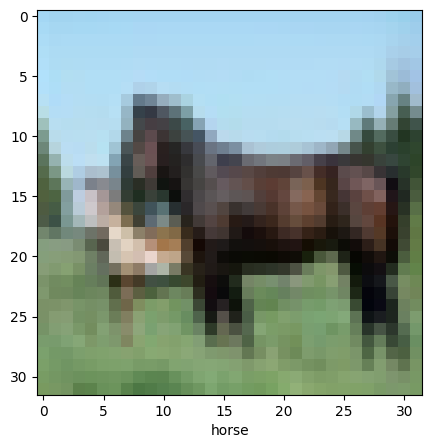

In [79]:
plot_sample(Xtrain,Ytrain,12)

In [80]:
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

In [81]:
Xtrain[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [82]:
cnn = models.Sequential([

    layers.Conv2D(filters = 64 ,kernel_size =(3,3), activation = 'relu', input_shape =(32,32,32)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [83]:

cnn = models.Sequential([
    layers.Input(shape=(32,32,3)),

    layers.Conv2D(filters = 64 ,kernel_size =(3,3), activation = 'relu', input_shape =(32,32,32)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [84]:
cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,890 (730.04 KB)

 Trainable params: 186,890 (730.04 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
cnn.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy']  )

In [86]:
cnn.fit(Xtrain, Ytrain, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3926 - loss: 1.6678
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6048 - loss: 1.1219
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6610 - loss: 0.9779
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6944 - loss: 0.8797
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7233 - loss: 0.8045
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7390 - loss: 0.7447
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7589 - loss: 0.6928
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7768 - loss: 0.6354
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7901 - loss: 0.6001
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8041 - loss: 0.5592


In [87]:
cnn.evaluate(Xtest,Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7063 - loss: 0.9035


[0.9117976427078247, 0.7038000226020813]

In [88]:
testloss , testacc = cnn.evaluate(Xtest,Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7063 - loss: 0.9035


In [89]:
print("Loss:",testloss)
print("Accuracy",testacc)

Loss: 0.9117976427078247
Accuracy 0.7038000226020813


In [90]:
y_pred = cnn.predict(Xtest)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([5.3554642e-05, 6.1960068e-06, 6.6981564e-05, 9.4801718e-01,
       1.6478397e-04, 4.9221184e-02, 6.4806745e-04, 5.0265930e-04,
       1.2932592e-03, 2.6131433e-05], dtype=float32)

In [91]:
sum(y_pred[0])

np.float32(0.99999994)

In [92]:
y_pred[:5]

array([[5.35546424e-05, 6.19600678e-06, 6.69815636e-05, 9.48017180e-01,
        1.64783967e-04, 4.92211841e-02, 6.48067449e-04, 5.02659299e-04,
        1.29325921e-03, 2.61314326e-05],
       [3.38102365e-03, 4.14977036e-03, 1.25328040e-06, 6.71806717e-08,
        1.49301123e-08, 1.43380063e-08, 9.06774389e-08, 1.02335909e-08,
        9.92460549e-01, 7.22566529e-06],
       [7.18511045e-02, 3.54710780e-02, 6.63880899e-04, 1.86335668e-03,
        5.46219293e-04, 6.82301252e-05, 8.36172723e-04, 1.32393878e-04,
        8.76647174e-01, 1.19204391e-02],
       [9.40544069e-01, 7.60389958e-03, 6.00055559e-03, 1.91173589e-04,
        3.96450996e-05, 1.37368545e-07, 2.67870637e-04, 1.74469881e-06,
        4.53066677e-02, 4.42535456e-05],
       [5.76263005e-07, 1.52457469e-05, 1.64494552e-02, 1.33445775e-02,
        8.94467235e-01, 8.77101789e-04, 7.45407343e-02, 7.16808881e-06,
        2.95859994e-04, 2.01370858e-06]], dtype=float32)

In [93]:
predicted_class = np.argmax(y_pred[0])
predicted_class

np.int64(3)

In [94]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [95]:
Ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

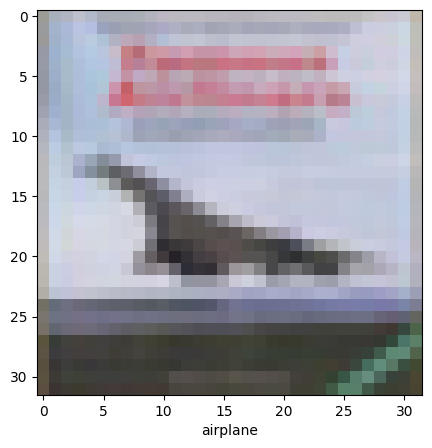

In [96]:
plot_sample(Xtest,Ytest,3)

## Save Model

save model  .h5 or .keras

In [97]:

cnn.save('CNN_model_Image.h5')

In [98]:
cnn.save('CNN_model_Image1.keras')

In [100]:
from tensorflow import keras
model = keras.models.load_model('CNN_model_Image1.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [101]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 373,782 (1.43 MB)

 Trainable params: 186,890 (730.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,892 (730.05 KB)

use save weights when we need to continue traing

In [104]:
cnn.save_weights('CNN_model_Image1.weights.h5')

In [105]:
cnn.load_weights('CNN_model_Image1.weights.h5')

In [106]:
cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,672 (2.14 MB)

 Trainable params: 186,890 (730.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,782 (1.43 MB)

## Continue Training


In [107]:
cnn.fit(Xtrain, Ytrain, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8178 - loss: 0.5168
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8281 - loss: 0.4876
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8399 - loss: 0.4497
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8479 - loss: 0.4285
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8608 - loss: 0.3981
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8709 - loss: 0.3681
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8783 - loss: 0.3482
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8883 - loss: 0.3202
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8971 - loss: 0.2928
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9038 - loss: 0.2733


In [108]:
cnn.evaluate(Xtest,Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6916 - loss: 1.3326


[1.346622109413147, 0.6883999705314636]